## このtutorialの目標
- bedファイル(/home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups)からldscoreを作成
- 作成したldscoreを使用してS-LDSCを実施する
- barplotで図示する

### 準備

cp /home/k1_taka/LDSC/S_LDSC_tutorial/takahashi_arranged_ldscore_eur-v1_20240902_tutorial.sh ~/LDSC/S_LDSC_tutorial5
cp /home/k1_taka/LDSC/S_LDSC_tutorial/takahashi_arranged_sldsc_eur-v1_20240902_tutorial.sh ~/LDSC/S_LDSC_tutorial5

### data_listの作成

##terminalに入力

mkdir -p ~/LDSC/S_LDSC_tutorial5/20241023_tutorial/data/info
cd /home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups
ls *.bed | sed 's/.bed//g' > ~/LDSC/S_LDSC_tutorial/20241023_tutorial/data/info/data_list

In [ ]:
mkdir -p ~/LDSC/S_LDSC_tutorial5/20241023_tutorial/data/info

In [ ]:
[harita@rc030 gene_region_v26_100KB_ext]$ cd ~/LDSC/S_LDSC_tutorial5/gene_region_v26_100KB_ext
[harita@rc030 gene_region_v26_100KB_ext]$ ls *.bed | sed 's/.bed//g' > ~/LDSC/S_LDSC_tutorial5/20241023_tutorial/data/info/data_list
[harita@rc030 gene_region_v26_100KB_ext]$ cat ~/LDSC/S_LDSC_tutorial5/20241023_tutorial/data/info/data_list
gene_list_0_region_hg19_ext100Kbp
gene_list_1_region_hg19_ext100Kbp
gene_list_2_region_hg19_ext100Kbp
gene_list_3_region_hg19_ext100Kbp
gene_list_4_region_hg19_ext100Kbp
gene_list_5_region_hg19_ext100Kbp
gene_list_6_region_hg19_ext100Kbp
gene_list_7_region_hg19_ext100Kbp
[harita@rc030 gene_region_v26_100KB_ext]$ ls ~/LDSC/S_LDSC_tutorial5/gene_region_v26_100KB_ext
gene_list_0_region_hg19_ext100Kbp.bed  gene_list_3_region_hg19_ext100Kbp.bed  gene_list_6_region_hg19_ext100Kbp.bed
gene_list_1_region_hg19_ext100Kbp.bed  gene_list_4_region_hg19_ext100Kbp.bed  gene_list_7_region_hg19_ext100Kbp.bed
gene_list_2_region_hg19_ext100Kbp.bed  gene_list_5_region_hg19_ext100Kbp.bed
[harita@rc030 gene_region_v26_100KB_ext]$ qlogin -l s_vmem=10G -l mem_req=10G
要求ハードリソース
  memory (s_vmem): 10G = ジョブは 1 スロットあたり 10G バイトのメモリを要求します
  slots (def_slot): 1 = ジョブは 100% の CPU を要求します
  total memory: 10G = ジョブは 10G バイトのメモリを要求します
通常の qlogin を実行します。
Your job 107073287 ("QLOGIN") has been submitted
waiting for interactive job to be scheduled ...
Your interactive job 107073287 has been successfully scheduled.
Establishing /home/geadmin/N1GE/utilbin/qlogin_wrapper session to host rc030i ...
[OS 8] You are now on OS 8 compute node.
Last login: Mon Oct 21 13:11:38 2024 from 172.28.2.105
==== あなたのグループ img_k1 のリソース利用状況 ====  hauq command version 1.13
* Home Disk use> 0 TB / 2 TB (4.4 %)   608 kfiles / 2000 kfiles (30.4 %)
* Arch Disk use> 0.0 TB / 4.0 TB (0.0 %)   [ 0.0 TB(cache) + 0.0 TB(tape) ]
* UGE queue use> mjobs.q: 0/256 (0 %)  ljobs.q: 0/48 (0 %)  lmem.q: 0/8 (0 %)  intr.q: 3/6 (50 %)
[harita@rc030 ~]$ export MKL_NUM_THREADS=1
[harita@rc030 ~]$ export OMP_NUM_THREADS=1
[harita@rc030 ~]$ export MKL_DOMAIN_NUM_THREADS=1
[harita@rc030 ~]$ unset PROMPT_COMMAND

##terminalに入力

qlogin -l s_vmem=10G -l mem_req=10G
export MKL_NUM_THREADS=1
export OMP_NUM_THREADS=1
export MKL_DOMAIN_NUM_THREADS=1
unset PROMPT_COMMAND


wd=~/LDSC/S_LDSC_tutorial5/20241023_tutorial


cd $wd
mkdir -p log



export PATH=/home/k1_taka/miniconda3/envs/ldsc/bin:/home/k1_taka/miniconda3/bin:${PATH}


dd=~/LDSC/S_LDSC_tutorial5/20241023_tutorial/data

info=${dd}/info/data_list
num=`wc -l $info |  cut -d " " -f1`



 #MAIN JOB
qsub -pe def_slot 1 \
   -l s_vmem=10G,mem_req=10G \
   -cwd \
   -t 1:${num} -tc 50 \
   -o log/ldscore_test.log \
   -e log/ldscore_test.error \
   ~/LDSC/S_LDSC_tutorial5/takahashi_arranged_ldscore_eur-v1_20240902_tutorial.sh ${dd}
 ${dd}

    #Your job-array 105103970.1-10:1 ("takahashi_arranged_ldscore_eur-v1_20240902_tutorial.sh") has been submitted
    #tc 同時実行数を制御





##terminalに入力

qlogin -l s_vmem=10G -l mem_req=10G
export MKL_NUM_THREADS=1
export OMP_NUM_THREADS=1
export MKL_DOMAIN_NUM_THREADS=1
unset PROMPT_COMMAND


wd=~/LDSC/S_LDSC_tutorial5/20241023_tutorial


cd $wd
mkdir -p log



export PATH=/home/k1_taka/miniconda3/envs/ldsc/bin:/home/k1_taka/miniconda3/bin:${PATH}


dd=~/LDSC/S_LDSC_tutorial5/20241023_tutorial/data

info=${dd}/info/data_list
num=`wc -l $info |  cut -d " " -f1`

qsub -pe def_slot 1 \
    -l s_vmem=10G,mem_req=10G \
    -cwd \
    -t 1:${num} -tc 50 \
    -o log/sldsc_test2.log \
    -e log/sldsc_test2.error \
    ~/LDSC/S_LDSC_tutorial5/takahashi_arranged_sldsc_eur-v1_20240902_tutorial2.sh ${dd}


In [1]:
波多野先生講座
qsub -pe def_slot 1 \
    -l s_vmem=10G,mem_req=10G \
    -cwd \
    -t 1:${num} -tc 50 \
    -o log/sldsc_test2.log \
    -e log/sldsc_test2.error \
    ~/LDSC/S_LDSC_tutorial5/takahashi_arranged_sldsc_eur-v1_20240902_tutorial2.sh ${dd}これの ${dd}の意味

ChatGPT:
ChatGPT
${dd} は、シェルスクリプトに渡す引数のことを指します。この引数は、スクリプト内で dd=${1} として定義されています。

つまり、この ${dd} は、スクリプト実行時に指定されるディレクトリやデータのパスなど、必要な情報を渡すための変数です。具体的にどのパスやデータが ${dd} に対応するかは、qsub コマンドを実行する際に、~/LDSC/S_LDSC_tutorial5/takahashi_arranged_sldsc_eur-v1_20240902_tutorial2.sh スクリプトの引数として指定されます。

例えば、qsub コマンド実行時に以下のように ${dd} の値として /path/to/data を渡した場合：

bash
コードをコピーする
qsub -pe def_slot 1 \
    -l s_vmem=10G,mem_req=10G \
    -cwd \
    -t 1:${num} -tc 50 \
    -o log/sldsc_test2.log \
    -e log/sldsc_test2.error \
    ~/LDSC/S_LDSC_tutorial5/takahashi_arranged_sldsc_eur-v1_20240902_tutorial2.sh /path/to/data
この /path/to/data が ${dd} に置き換えられ、スクリプト内で利用されます。

まとめると、${dd} は実行時に渡すデータディレクトリや情報であり、シェルスクリプトの第1引数として扱われます。






あなた:
この引数は、スクリプト内で dd=${1} として定義されています。ってなんでわかるの？
ChatGPT:
ChatGPT
引数が ${dd} として使われていることがわかった理由は、前に示されたスクリプト内で、次のようなコードが見られたからです：

bash
コードをコピーする
dd=${1}
この行では、スクリプト実行時に渡される最初の引数（$1）が変数 dd に代入されています。この dd がスクリプトの他の場所で使われているため、${dd} という記述が何かの引数として使用されるものだと推測できます。

$1 は、シェルスクリプト実行時に最初に渡される引数を表す特殊変数です。たとえば、次のようにスクリプトが実行された場合：

bash
コードをコピーする
./script.sh argument1 argument2
この場合、$1 には argument1 が入り、$2 には argument2 が入ります。したがって、dd=${1} の行は、スクリプト実行時の第1引数（argument1 の部分）を変数 dd に代入することを意味しています。

これが、スクリプト内で dd=${1} と定義されているため、${dd} は実行時に渡される引数だと判断できる理由です。

ERROR: Error:  オブジェクト '波多野先生講座' がありません 


## -log10pのbarplotの作成

In [1]:
##ここからはR

library(ggplot2) 

set.seed(1)
library(fs)
library(data.table)
library(dplyr)
library(tidyverse)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:data.table’ からマスクされています:

    between, first, last


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.t

## X: CC毎の比較, y: -log10p, facet: sumstats (noexp)

In [2]:
# 正しいディレクトリパスを設定
dir_path <- "~/LDSC/S_LDSC_tutorial5/20241023_tutorial/sldsc2"
gene_list_dirs <- paste0("gene_list_", 0:7, "_region_hg19_ext100Kbp") # genelist 0~7まで

# 結果を格納するデータフレームを初期化
enrichment_allsumstats_df <- data.frame(matrix(ncol=11, nrow=0))  # 11列のデータフレーム

# 対象とする sumstats のリストを修正
sumstats_list <- c("Lupus_langefeld.results", 
                   "Allergy_Eczema.results",  # 正しいファイル名に修正
                   "Asthma.results",          # 正しいファイル名に修正
                   "PASS_CD_deLange2017.results",
                   "PASS_Schizophrenia_Pardinas2018.results",  
                   "PASS_BMI1.results", 
                   "RA_ishigaki.results", 
                   "PASS_SleepDuration_Dashti2019.results",
                   "PASS_Type_2_Diabetes.results",
                   "AdultOnsetAsthma_Ferreira2019.results")

# 各 gene_list ディレクトリ内のファイルを順に処理
for (gene_list_dir in gene_list_dirs) {
    for (sumstats in sumstats_list) {
        # ファイルパスを設定
        file_path <- paste0(dir_path, "/", gene_list_dir, "/", sumstats)
        
        # ファイルが存在するかをチェック
        if (file.exists(file_path)) {
            # データを読み込み
            df <- read.table(file_path, header=TRUE)
            
            # アノテーションの部分を取得 (必要な部分を抽出)
            annotation_df <- df[1, 2:10]  # 2列目から10列目を取得
            
            # 結果のデータフレームに追加
            new_df <- data.frame(sumstatsname = sumstats, celltype = gene_list_dir, annotation_df)
            enrichment_allsumstats_df <- rbind(enrichment_allsumstats_df, new_df)
        }
    }
}

# 結果のデータフレームを確認
head(enrichment_allsumstats_df)


,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Lupus_langefeld.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.24098542,0.054973621,2.657939,0.6063294,1.566057e-05,5.150601e-08,3.128161e-08,1.6465267
2,Allergy_Eczema.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.14679271,0.015512202,1.619044,0.1710912,2.103337e-04,-2.475659e-09,2.610798e-09,-0.9482383
3,Asthma.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.16862990,0.021413091,1.859897,0.2361749,3.292922e-04,3.410474e-10,2.382935e-09,0.1431207
4,PASS_CD_deLange2017.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.19878953,0.023971810,2.192541,0.2643961,5.161888e-06,8.531248e-09,2.168468e-08,0.3934228
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.12192919,0.009928893,1.344813,0.1095103,1.724125e-03,1.037457e-08,8.669417e-09,1.1966863
6,PASS_BMI1.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.09398509,0.011514714,1.036605,0.1270011,7.730427e-01,-4.229178e-09,3.134673e-09,-1.3491608


In [3]:
# クラスターごとの結果を確認
gene_list_0 <- filter(enrichment_allsumstats_df, celltype == "gene_list_0_region_hg19_ext100Kbp")
gene_list_1 <- filter(enrichment_allsumstats_df, celltype == "gene_list_1_region_hg19_ext100Kbp")

# 結果を表示
print(gene_list_0)
print(gene_list_1)


                              sumstatsname                          celltype
1                  Lupus_langefeld.results gene_list_0_region_hg19_ext100Kbp
2                   Allergy_Eczema.results gene_list_0_region_hg19_ext100Kbp
3                           Asthma.results gene_list_0_region_hg19_ext100Kbp
4              PASS_CD_deLange2017.results gene_list_0_region_hg19_ext100Kbp
5  PASS_Schizophrenia_Pardinas2018.results gene_list_0_region_hg19_ext100Kbp
6                        PASS_BMI1.results gene_list_0_region_hg19_ext100Kbp
7                      RA_ishigaki.results gene_list_0_region_hg19_ext100Kbp
8    PASS_SleepDuration_Dashti2019.results gene_list_0_region_hg19_ext100Kbp
9             PASS_Type_2_Diabetes.results gene_list_0_region_hg19_ext100Kbp
10   AdultOnsetAsthma_Ferreira2019.results gene_list_0_region_hg19_ext100Kbp
   Prop._SNPs   Prop._h2 Prop._h2_std_error Enrichment Enrichment_std_error
1  0.09066626 0.24098542        0.054973621   2.657939            0.6063294
2

In [4]:
# 例: AdultOnsetAsthma_Ferreira2019.results の結果を表示
subset(enrichment_allsumstats_df, sumstatsname == "AdultOnsetAsthma_Ferreira2019.results")

,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,AdultOnsetAsthma_Ferreira2019.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.14663092,0.021234729,1.617260,0.2342076,7.339886e-03,-5.632206e-10,2.019633e-09,-0.2788728
20,AdultOnsetAsthma_Ferreira2019.results,gene_list_1_region_hg19_ext100Kbp,0.01865510,0.07744693,0.013939336,4.151516,0.7472133,5.864157e-05,1.504641e-08,5.578266e-09,2.6973280
30,AdultOnsetAsthma_Ferreira2019.results,gene_list_2_region_hg19_ext100Kbp,0.12488847,0.28505263,0.022966446,2.282458,0.1838957,7.237776e-09,5.960618e-09,1.904086e-09,3.1304360
40,AdultOnsetAsthma_Ferreira2019.results,gene_list_3_region_hg19_ext100Kbp,0.11660132,0.26863073,0.024168749,2.303840,0.2072768,2.619225e-08,6.721713e-09,1.951732e-09,3.4439737
50,AdultOnsetAsthma_Ferreira2019.results,gene_list_4_region_hg19_ext100Kbp,0.05005956,0.11226146,0.017839635,2.242558,0.3563682,6.444741e-04,4.554701e-09,2.838172e-09,1.6048011
60,AdultOnsetAsthma_Ferreira2019.results,gene_list_5_region_hg19_ext100Kbp,0.01658235,0.02912273,0.008346898,1.756249,0.5033605,1.216766e-01,-1.264422e-09,3.919399e-09,-0.3226062
70,AdultOnsetAsthma_Ferreira2019.results,gene_list_6_region_hg19_ext100Kbp,0.10836014,0.18622070,0.021707720,1.718535,0.2003294,2.902899e-04,5.939229e-10,1.666378e-09,0.3564155
80,AdultOnsetAsthma_Ferreira2019.results,gene_list_7_region_hg19_ext100Kbp,0.12364542,0.20456274,0.022623208,1.654430,0.1829684,2.841450e-04,1.755896e-09,1.619401e-09,1.0842871


In [5]:
# 例: gene_list_0_region_hg19_ext100Kbp の結果を表示
subset(enrichment_allsumstats_df, celltype == "gene_list_0_region_hg19_ext100Kbp")

,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Lupus_langefeld.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.24098542,0.054973621,2.657939,0.6063294,1.566057e-05,5.150601e-08,3.128161e-08,1.6465267
2,Allergy_Eczema.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.14679271,0.015512202,1.619044,0.1710912,2.103337e-04,-2.475659e-09,2.610798e-09,-0.9482383
3,Asthma.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.16862990,0.021413091,1.859897,0.2361749,3.292922e-04,3.410474e-10,2.382935e-09,0.1431207
4,PASS_CD_deLange2017.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.19878953,0.023971810,2.192541,0.2643961,5.161888e-06,8.531248e-09,2.168468e-08,0.3934228
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.12192919,0.009928893,1.344813,0.1095103,1.724125e-03,1.037457e-08,8.669417e-09,1.1966863
6,PASS_BMI1.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.09398509,0.011514714,1.036605,0.1270011,7.730427e-01,-4.229178e-09,3.134673e-09,-1.3491608
7,RA_ishigaki.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.20080870,0.020393463,2.214812,0.2249289,2.909332e-07,1.152923e-08,8.109863e-09,1.4216312
8,PASS_SleepDuration_Dashti2019.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.10005114,0.009479216,1.103510,0.1045506,3.207941e-01,-2.421091e-10,1.241703e-09,-0.1949816
9,PASS_Type_2_Diabetes.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.15189878,0.028307215,1.675362,0.3122133,2.737603e-02,2.358215e-09,5.714604e-09,0.4126647


In [6]:
enrichment_allsumstats_df$minuslog10p=-log10(pnorm(-enrichment_allsumstats_df$Coefficient_z.score,0,1))

In [7]:
out_f <- "~/LDSC/S_LDSC_tutorial5/20241023_tutorial/plot2"
dir.create(out_f, recursive = TRUE)

Warning message in dir.create(out_f, recursive = TRUE):
“ '/home/harita/LDSC/S_LDSC_tutorial5/20241023_tutorial/plot2' はすでに存在します ”


In [8]:
# metadataの作成 (data_listに基づく)
metadata <- data.frame(
  file_num = 1:8,
  cell_type = paste0("gene_list_", 0:7, "_region_hg19_ext100Kbp")
)

# metadataを確認
print(metadata)

  file_num                         cell_type
1        1 gene_list_0_region_hg19_ext100Kbp
2        2 gene_list_1_region_hg19_ext100Kbp
3        3 gene_list_2_region_hg19_ext100Kbp
4        4 gene_list_3_region_hg19_ext100Kbp
5        5 gene_list_4_region_hg19_ext100Kbp
6        6 gene_list_5_region_hg19_ext100Kbp
7        7 gene_list_6_region_hg19_ext100Kbp
8        8 gene_list_7_region_hg19_ext100Kbp


In [9]:
head(metadata)

,file_num,cell_type
,<int>,<chr>
1,1,gene_list_0_region_hg19_ext100Kbp
2,2,gene_list_1_region_hg19_ext100Kbp
3,3,gene_list_2_region_hg19_ext100Kbp
4,4,gene_list_3_region_hg19_ext100Kbp
5,5,gene_list_4_region_hg19_ext100Kbp
6,6,gene_list_5_region_hg19_ext100Kbp


In [10]:
colnames(metadata) <- c("file_num", "cell_type")

In [11]:
metadata$file_num <- as.character(metadata$file_num)

In [12]:
# 列名を設定
colnames(metadata) <- c("file_num", "cell_type")

# file_numをcharacter型に変換
metadata$file_num <- as.character(metadata$file_num)

# 結果を確認
print(metadata)

  file_num                         cell_type
1        1 gene_list_0_region_hg19_ext100Kbp
2        2 gene_list_1_region_hg19_ext100Kbp
3        3 gene_list_2_region_hg19_ext100Kbp
4        4 gene_list_3_region_hg19_ext100Kbp
5        5 gene_list_4_region_hg19_ext100Kbp
6        6 gene_list_5_region_hg19_ext100Kbp
7        7 gene_list_6_region_hg19_ext100Kbp
8        8 gene_list_7_region_hg19_ext100Kbp


In [13]:
metadata

file_num,cell_type
<chr>,<chr>
1,gene_list_0_region_hg19_ext100Kbp
2,gene_list_1_region_hg19_ext100Kbp
3,gene_list_2_region_hg19_ext100Kbp
4,gene_list_3_region_hg19_ext100Kbp
5,gene_list_4_region_hg19_ext100Kbp
6,gene_list_5_region_hg19_ext100Kbp
7,gene_list_6_region_hg19_ext100Kbp
8,gene_list_7_region_hg19_ext100Kbp


In [14]:
# cell_type列がcharacter型に変換されていることを確認
metadata$file_num <- as.character(metadata$file_num)

# enrichment_allsumstats_dfとmetadataをcell_type列で結合
merge_df <- left_join(enrichment_allsumstats_df, metadata, by=c("celltype" = "cell_type"))


In [15]:
# dplyrパッケージの読み込み
library(dplyr)

# cell_type列がcharacter型に変換されていることを確認
metadata$file_num <- as.character(metadata$file_num)

# enrichment_allsumstats_dfとmetadataをcell_type列で結合
merge_df <- left_join(enrichment_allsumstats_df, metadata, by=c("celltype" = "cell_type"))

In [16]:
head(merge_df)

,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,minuslog10p,file_num
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Lupus_langefeld.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.24098542,0.054973621,2.657939,0.6063294,1.566057e-05,5.150601e-08,3.128161e-08,1.6465267,1.30252930,1
2,Allergy_Eczema.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.14679271,0.015512202,1.619044,0.1710912,2.103337e-04,-2.475659e-09,2.610798e-09,-0.9482383,0.08170963,1
3,Asthma.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.16862990,0.021413091,1.859897,0.2361749,3.292922e-04,3.410474e-10,2.382935e-09,0.1431207,0.35350077,1
4,PASS_CD_deLange2017.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.19878953,0.023971810,2.192541,0.2643961,5.161888e-06,8.531248e-09,2.168468e-08,0.3934228,0.45966602,1
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.12192919,0.009928893,1.344813,0.1095103,1.724125e-03,1.037457e-08,8.669417e-09,1.1966863,0.93661251,1
6,PASS_BMI1.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.09398509,0.011514714,1.036605,0.1270011,7.730427e-01,-4.229178e-09,3.134673e-09,-1.3491608,0.04031131,1


In [17]:
merge_df2=merge_df %>% separate(cell_type, c("cell_type2", ".bed"), sep="\\.")

ERROR: [1m[33mError[39m in `separate()`:[22m
[1mCaused by error:[22m
[33m![39m  オブジェクト 'cell_type' がありません 


In [18]:
# tidyr パッケージをロード
library(tidyr)

# 列を分割
merge_df2 = merge_df %>% separate(cell_type, c("cell_type2", ".bed"), sep="\\.")

ERROR: [1m[33mError[39m in `separate()`:[22m
[1mCaused by error:[22m
[33m![39m  オブジェクト 'cell_type' がありません 


In [17]:
colnames(merge_df)

[1] "sumstatsname"          "celltype"              "Prop._SNPs"           
 [4] "Prop._h2"              "Prop._h2_std_error"    "Enrichment"           
 [7] "Enrichment_std_error"  "Enrichment_p"          "Coefficient"          
[10] "Coefficient_std_error" "Coefficient_z.score"   "minuslog10p"          
[13] "file_num"

In [18]:
# 列を分割
merge_df2 = merge_df %>% separate(celltype, c("cell_type2", ".bed"), sep="\\.")

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 80 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
17, 18, 19, 20, ...].”


In [19]:
# celltype列の中身を確認
unique(merge_df$celltype)

[1] "gene_list_0_region_hg19_ext100Kbp" "gene_list_1_region_hg19_ext100Kbp"
[3] "gene_list_2_region_hg19_ext100Kbp" "gene_list_3_region_hg19_ext100Kbp"
[5] "gene_list_4_region_hg19_ext100Kbp" "gene_list_5_region_hg19_ext100Kbp"
[7] "gene_list_6_region_hg19_ext100Kbp" "gene_list_7_region_hg19_ext100Kbp"

In [20]:
# 列を "_region_hg19_ext100Kbp" の部分で分割して、番号部分を抽出
merge_df2 <- merge_df %>% 
  mutate(cell_type2 = gsub("_region_hg19_ext100Kbp", "", celltype))

# 結果を確認
head(merge_df2)

,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,minuslog10p,file_num,cell_type2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Lupus_langefeld.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.24098542,0.054973621,2.657939,0.6063294,1.566057e-05,5.150601e-08,3.128161e-08,1.6465267,1.30252930,1,gene_list_0
2,Allergy_Eczema.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.14679271,0.015512202,1.619044,0.1710912,2.103337e-04,-2.475659e-09,2.610798e-09,-0.9482383,0.08170963,1,gene_list_0
3,Asthma.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.16862990,0.021413091,1.859897,0.2361749,3.292922e-04,3.410474e-10,2.382935e-09,0.1431207,0.35350077,1,gene_list_0
4,PASS_CD_deLange2017.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.19878953,0.023971810,2.192541,0.2643961,5.161888e-06,8.531248e-09,2.168468e-08,0.3934228,0.45966602,1,gene_list_0
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.12192919,0.009928893,1.344813,0.1095103,1.724125e-03,1.037457e-08,8.669417e-09,1.1966863,0.93661251,1,gene_list_0
6,PASS_BMI1.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.09398509,0.011514714,1.036605,0.1270011,7.730427e-01,-4.229178e-09,3.134673e-09,-1.3491608,0.04031131,1,gene_list_0


In [23]:
ここからトラブルシューTingしていく

ERROR: Error:  オブジェクト 'ここからトラブルシューTingしていく' がありません 


In [21]:
# クラスターごとのデータの概要を確認
table(merge_df2$cell_type2)


gene_list_0 gene_list_1 gene_list_2 gene_list_3 gene_list_4 gene_list_5 
         10          10          10          10          10          10 
gene_list_6 gene_list_7 
         10          10 

In [22]:
# merge_df が存在するか確認
exists("merge_df")

[1] TRUE

In [23]:
# クラスターごとにp値を確認
summary(merge_df2$minuslog10p)

# クラスターごとのp値のユニークな値を確認
unique(merge_df2$minuslog10p)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01027 0.34212 0.83665 1.22275 1.66969 4.22757 

[1] 1.30252930 0.08170963 0.35350077 0.45966602 0.93661251 0.04031131
 [7] 1.11032481 0.23860122 0.46861544 0.21479209 0.49768662 2.20281030
[13] 1.49595406 2.12065746 0.76756654 0.32924903 0.87417638 1.33353424
[19] 0.49202257 2.45656283 1.48772797 3.05175633 4.18065473 4.22756569
[25] 2.66543078 0.01026826 3.92614043 0.49260838 0.07810673 3.05911755
[31] 1.01222652 3.64435016 3.51815252 3.21242421 0.67663728 0.75016852
[37] 3.07969233 0.35810824 0.12205347 3.54269993 1.62795176 1.14398345
[43] 1.41826198 2.23498225 1.58501337 0.34293663 2.20421645 0.98125235
[49] 0.33966954 1.26544989 0.01268384 0.60750771 0.57702410 1.79492112
[55] 0.09817602 0.12898549 0.82111796 0.23054368 0.84411170 0.20307668
[61] 3.52730691 0.82918028 1.60751911 2.54073317 0.37345801 0.05341515
[67] 2.22482634 0.70275495 0.34934518 0.44277594 0.95194257 0.11903154
[73] 0.28309112 0.30926859 0.23937567 0.07802606 0.34816656 1.22686069
[79] 1.42135134 0.85661427

In [24]:
# 各クラスターのデータを確認
head(merge_df2 %>% filter(cell_type2 == "gene_list_0"))
head(merge_df2 %>% filter(cell_type2 == "gene_list_1"))

,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,minuslog10p,file_num,cell_type2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Lupus_langefeld.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.24098542,0.054973621,2.657939,0.6063294,1.566057e-05,5.150601e-08,3.128161e-08,1.6465267,1.30252930,1,gene_list_0
2,Allergy_Eczema.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.14679271,0.015512202,1.619044,0.1710912,2.103337e-04,-2.475659e-09,2.610798e-09,-0.9482383,0.08170963,1,gene_list_0
3,Asthma.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.16862990,0.021413091,1.859897,0.2361749,3.292922e-04,3.410474e-10,2.382935e-09,0.1431207,0.35350077,1,gene_list_0
4,PASS_CD_deLange2017.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.19878953,0.023971810,2.192541,0.2643961,5.161888e-06,8.531248e-09,2.168468e-08,0.3934228,0.45966602,1,gene_list_0
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.12192919,0.009928893,1.344813,0.1095103,1.724125e-03,1.037457e-08,8.669417e-09,1.1966863,0.93661251,1,gene_list_0
6,PASS_BMI1.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.09398509,0.011514714,1.036605,0.1270011,7.730427e-01,-4.229178e-09,3.134673e-09,-1.3491608,0.04031131,1,gene_list_0


,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,minuslog10p,file_num,cell_type2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Lupus_langefeld.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.05495116,0.018071649,2.945638,0.9687245,1.909193e-02,2.809603e-08,5.933286e-08,0.47353232,0.4976866,2,gene_list_1
2,Allergy_Eczema.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.06980471,0.010979108,3.741857,0.5885313,1.275688e-05,2.064833e-08,8.270459e-09,2.49663616,2.2028103,2,gene_list_1
3,Asthma.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.07424813,0.016304368,3.980045,0.8739900,2.126230e-03,1.759117e-08,9.491741e-09,1.85331300,1.4959541,2,gene_list_1
4,PASS_CD_deLange2017.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.08353392,0.012970891,4.477807,0.6953001,6.898860e-06,1.343023e-07,5.529558e-08,2.42880682,2.1206575,2,gene_list_1
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.02690230,0.005065708,1.442089,0.2715455,1.047012e-01,1.742826e-08,1.832445e-08,0.95109291,0.7675665,2,gene_list_1
6,PASS_BMI1.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.02355940,0.005909873,1.262893,0.3167967,4.075688e-01,5.633774e-10,7.137793e-09,0.07892879,0.3292490,2,gene_list_1


In [25]:
# 各クラスターのデータを確認
head(merge_df2 %>% filter(cell_type2 == "gene_list_0"))
head(merge_df2 %>% filter(cell_type2 == "gene_list_1"))

,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,minuslog10p,file_num,cell_type2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Lupus_langefeld.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.24098542,0.054973621,2.657939,0.6063294,1.566057e-05,5.150601e-08,3.128161e-08,1.6465267,1.30252930,1,gene_list_0
2,Allergy_Eczema.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.14679271,0.015512202,1.619044,0.1710912,2.103337e-04,-2.475659e-09,2.610798e-09,-0.9482383,0.08170963,1,gene_list_0
3,Asthma.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.16862990,0.021413091,1.859897,0.2361749,3.292922e-04,3.410474e-10,2.382935e-09,0.1431207,0.35350077,1,gene_list_0
4,PASS_CD_deLange2017.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.19878953,0.023971810,2.192541,0.2643961,5.161888e-06,8.531248e-09,2.168468e-08,0.3934228,0.45966602,1,gene_list_0
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.12192919,0.009928893,1.344813,0.1095103,1.724125e-03,1.037457e-08,8.669417e-09,1.1966863,0.93661251,1,gene_list_0
6,PASS_BMI1.results,gene_list_0_region_hg19_ext100Kbp,0.09066626,0.09398509,0.011514714,1.036605,0.1270011,7.730427e-01,-4.229178e-09,3.134673e-09,-1.3491608,0.04031131,1,gene_list_0


,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,minuslog10p,file_num,cell_type2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Lupus_langefeld.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.05495116,0.018071649,2.945638,0.9687245,1.909193e-02,2.809603e-08,5.933286e-08,0.47353232,0.4976866,2,gene_list_1
2,Allergy_Eczema.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.06980471,0.010979108,3.741857,0.5885313,1.275688e-05,2.064833e-08,8.270459e-09,2.49663616,2.2028103,2,gene_list_1
3,Asthma.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.07424813,0.016304368,3.980045,0.8739900,2.126230e-03,1.759117e-08,9.491741e-09,1.85331300,1.4959541,2,gene_list_1
4,PASS_CD_deLange2017.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.08353392,0.012970891,4.477807,0.6953001,6.898860e-06,1.343023e-07,5.529558e-08,2.42880682,2.1206575,2,gene_list_1
5,PASS_Schizophrenia_Pardinas2018.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.02690230,0.005065708,1.442089,0.2715455,1.047012e-01,1.742826e-08,1.832445e-08,0.95109291,0.7675665,2,gene_list_1
6,PASS_BMI1.results,gene_list_1_region_hg19_ext100Kbp,0.0186551,0.02355940,0.005909873,1.262893,0.3167967,4.075688e-01,5.633774e-10,7.137793e-09,0.07892879,0.3292490,2,gene_list_1


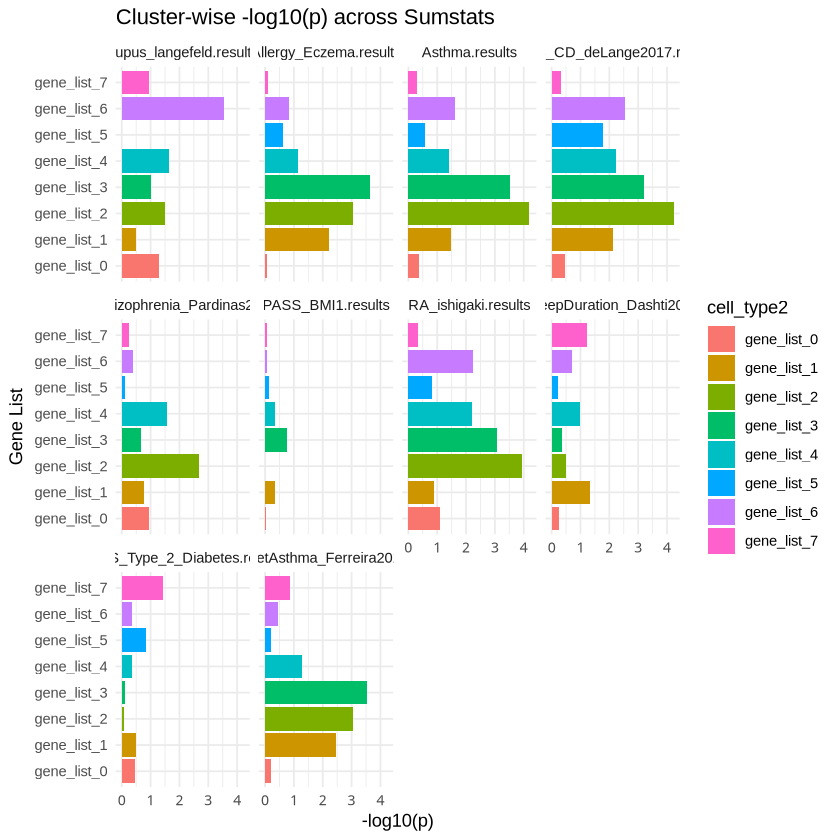

In [66]:
# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats")

# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width = 10, height = 10)

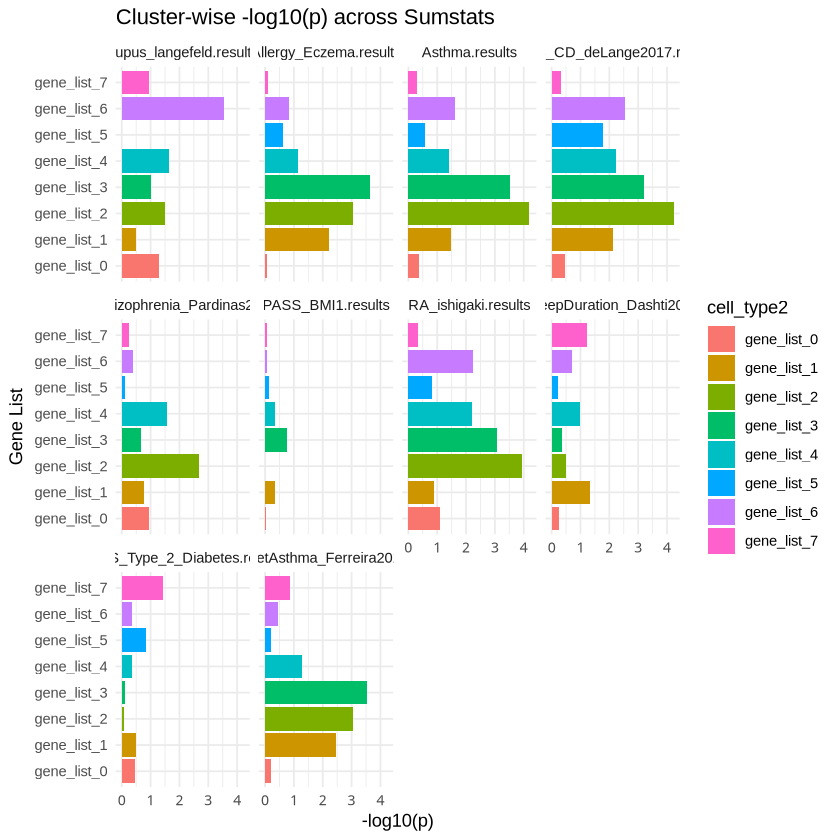

In [67]:
# ggplot2 パッケージをロード
library(ggplot2)

# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats")

# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width = 10, height = 10)

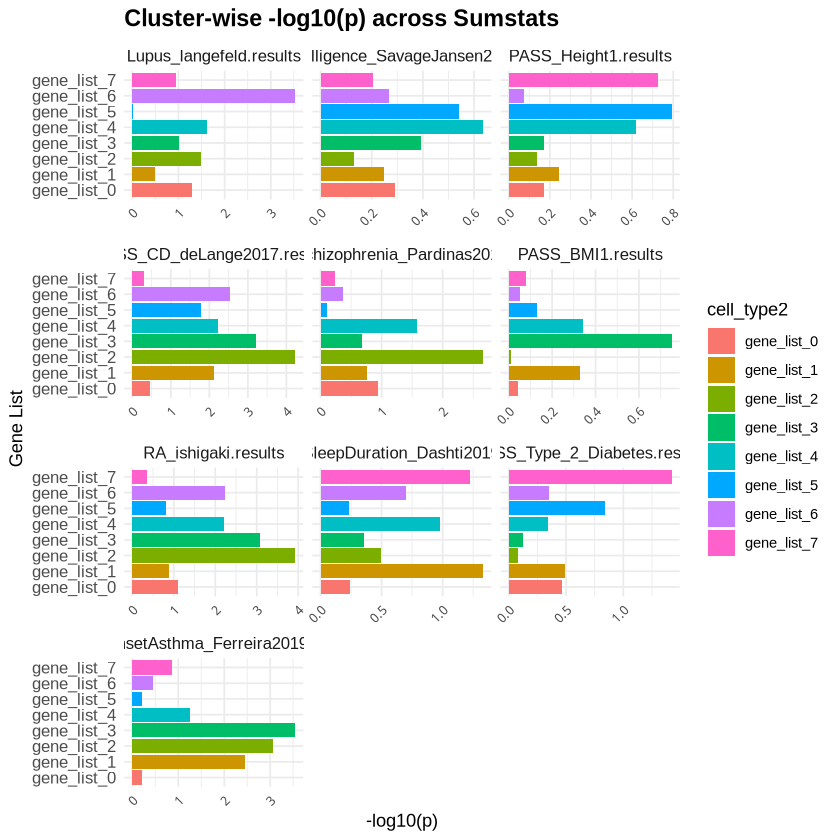

In [29]:
# ggplot2 パッケージをロード
library(ggplot2)

# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, ncol = 3, scales = "free_x") +  # 3列に変更し、重ならないように調整
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),  # X軸のラベルを45度に傾けて調整
    axis.text.y = element_text(size = 10),  # Y軸のラベルを調整
    strip.text = element_text(size = 10),   # facetのタイトルのフォントサイズを調整
    legend.position = "right",              # 凡例を右に配置
    plot.title = element_text(size = 14, face = "bold")  # タイトルのフォントサイズを大きく
  )

# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats_adjusted.pdf"), width = 12, height = 10)

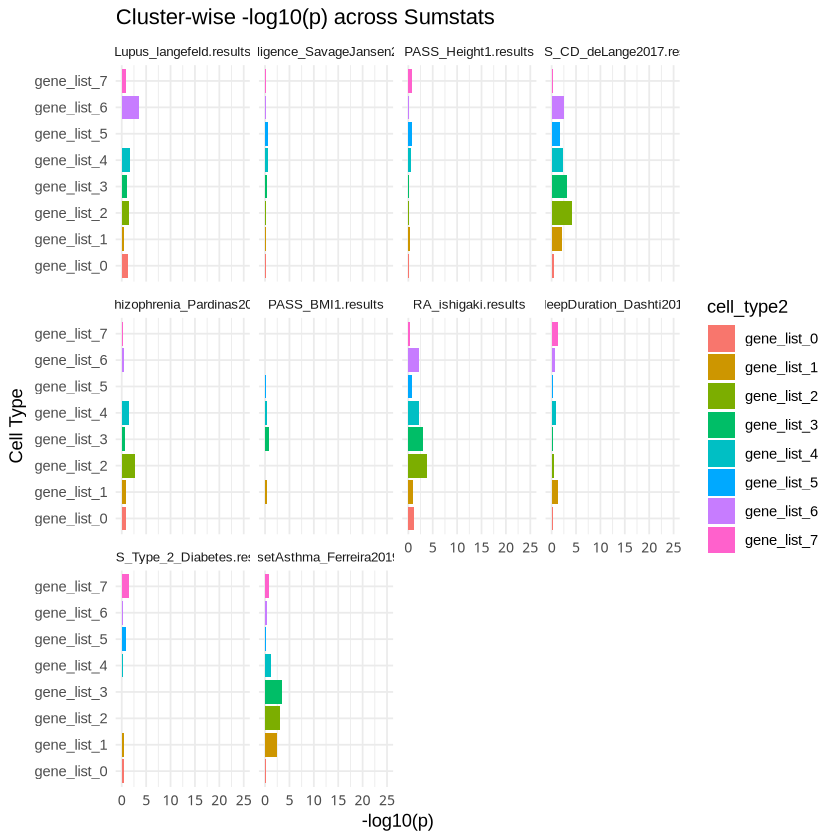

In [30]:
# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, ncol = 4) +  # 一列に4つずつ配置
  theme_minimal() +
  scale_x_continuous(limits = c(0, 25)) +  # x軸の範囲を調整
  theme(strip.text.x = element_text(size = 8, angle = 0)) +  # ファセットラベルの調整
  labs(x = "-log10(p)", y = "Cell Type", title = "Cluster-wise -log10(p) across Sumstats")

# 保存
ggsave(paste0(out_f, "/adjusted_barplot_minuslog10p_all_sumstats.pdf"), width = 12, height = 10)

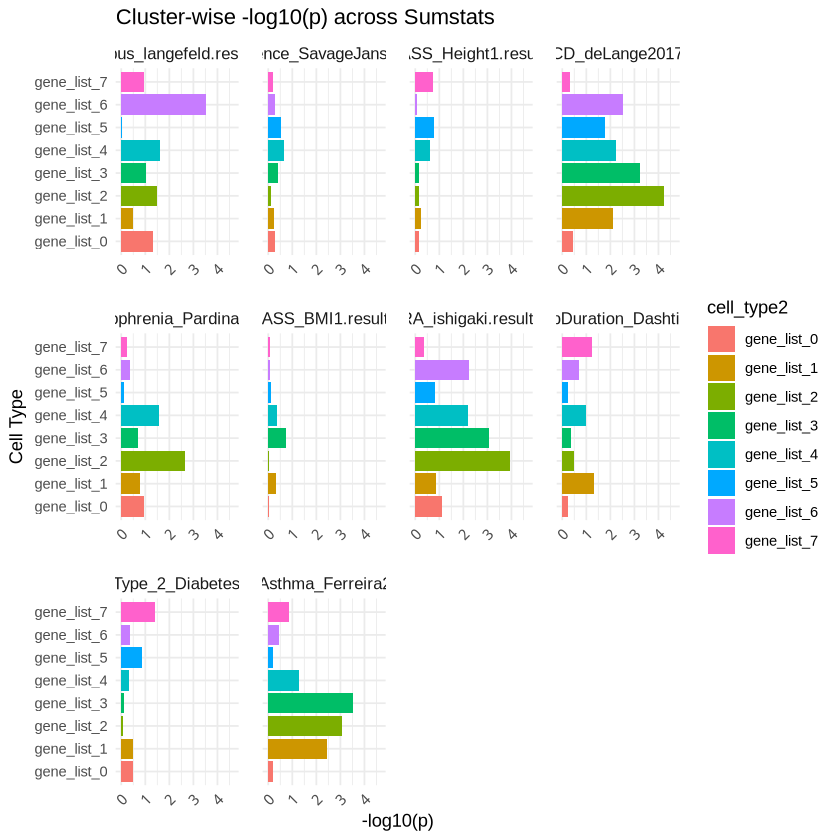

In [31]:
# パッケージをロード
library(ggplot2)

# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 3, scales = "free_x") +  # グラフの間隔を調整
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), # x軸のラベルを45度に回転
    strip.text = element_text(size = 10),  # facetのタイトルのサイズを調整
    panel.spacing = unit(1, "lines")  # facet間のスペースを広げる
  ) +
  labs(x = "-log10(p)", y = "Cell Type", title = "Cluster-wise -log10(p) across Sumstats") +
  scale_x_continuous(limits = c(0, max(merge_df2$minuslog10p) * 1.1))  # x軸の範囲を調整

# 保存
ggsave(paste0(out_f, "/adjusted_barplot_minuslog10p_all_sumstats.pdf"), width = 12, height = 8)

In [ ]:
Lupus_langefeld.results（ループス）
RA_ishigaki.results（関節リウマチ）
2. アレルギー・アトピー関連疾患
Allergy_Eczema.results（アレルギー・湿疹）
Asthma.results（喘息）
AdultOnsetAsthma_Ferreira2019.results（成人発症喘息）
3. 精神疾患
PASS_Schizophrenia_Pardinas2018.results（統合失調症）
4. メタボリックおよび生活習慣関連
PASS_BMI1.results（BMI）
PASS_SleepDuration_Dashti2019.results（睡眠時間）
PASS_Type_2_Diabetes.results（2型糖尿病）
5. その他
PASS_CD_deLange2017.results（クローン病）

In [26]:
# 指定された順番で並べ替え
sorted_sumstats_list <- c(
  'Allergy_Eczema.results',
  'Asthma.results',
  'AdultOnsetAsthma_Ferreira2019.results',
  'Lupus_langefeld.results',
  'RA_ishigaki.results',
  'PASS_CD_deLange2017.results',
  'PASS_Schizophrenia_Pardinas2018.results',
  'PASS_BMI1.results',
  'PASS_SleepDuration_Dashti2019.results',
  'PASS_Type_2_Diabetes.results'
)

sorted_sumstats_list

[1] "Allergy_Eczema.results"                 
 [2] "Asthma.results"                         
 [3] "AdultOnsetAsthma_Ferreira2019.results"  
 [4] "Lupus_langefeld.results"                
 [5] "RA_ishigaki.results"                    
 [6] "PASS_CD_deLange2017.results"            
 [7] "PASS_Schizophrenia_Pardinas2018.results"
 [8] "PASS_BMI1.results"                      
 [9] "PASS_SleepDuration_Dashti2019.results"  
[10] "PASS_Type_2_Diabetes.results"

ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Cannot use `+` with a single argument.
[36mℹ[39m Did you accidentally put `+` on a new line?


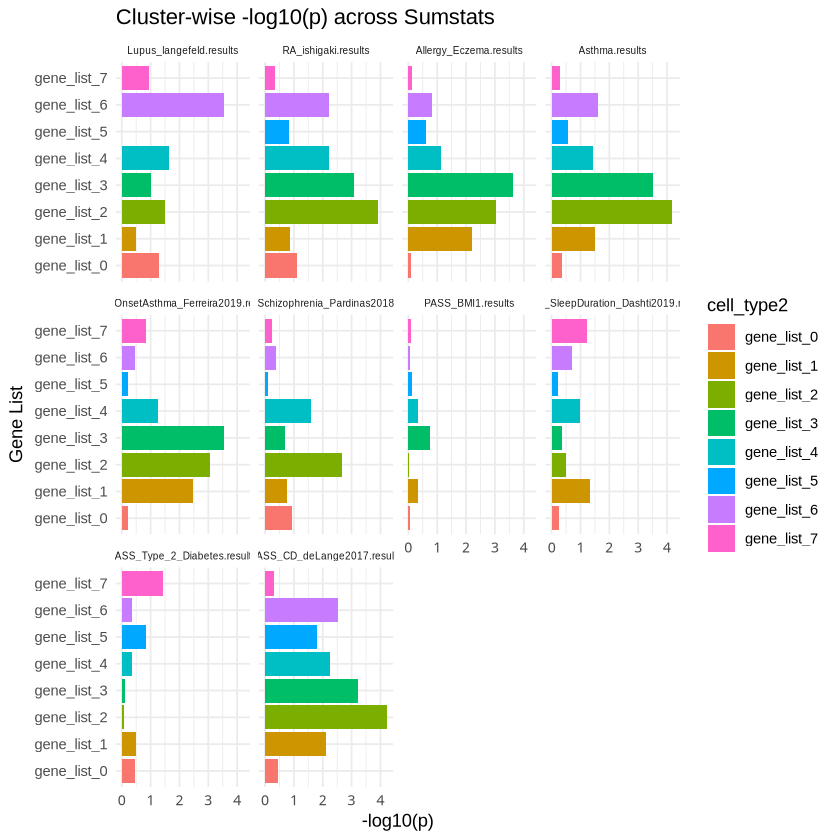

In [31]:
# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(strip.text.x = element_text(size = 6),  # タイトルのフォントサイズを調整
        strip.text.y = element_text(angle = 0))  # タイトルの角度を調整
+ geom_hline(yintercept=-log10(0.05/7),color='red')
# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width = 10, height = 10)



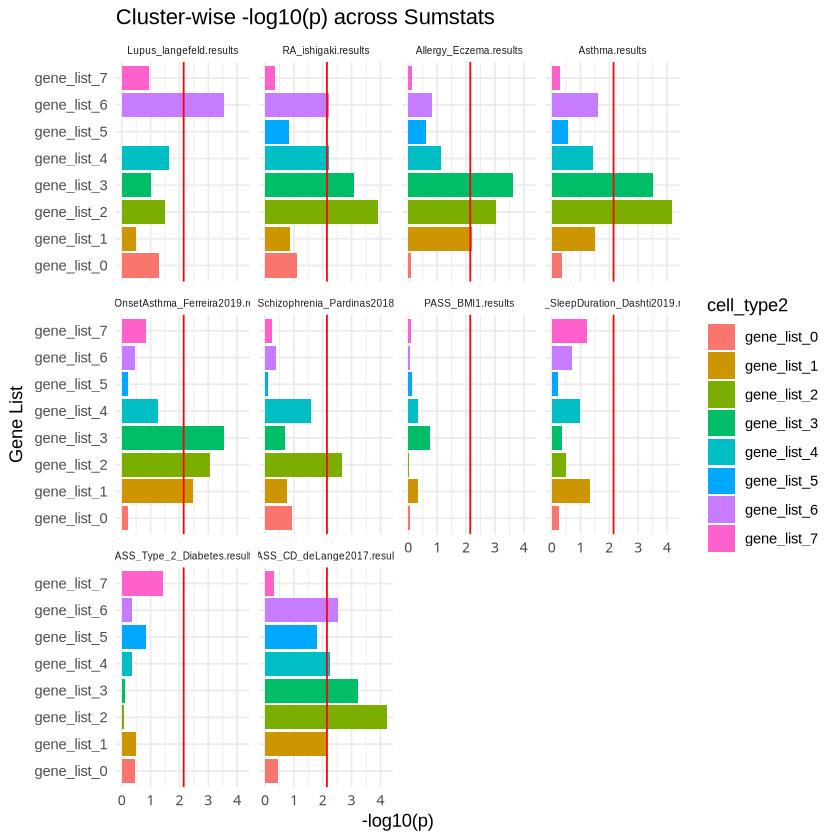

In [33]:
# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(strip.text.x = element_text(size = 6),  # タイトルのフォントサイズを調整
        strip.text.y = element_text(angle = 0)) +  # タイトルの角度を調整
  geom_vline(xintercept = -log10(0.05/7), color = 'red')  # 横線を追加

# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width = 10, height = 10)


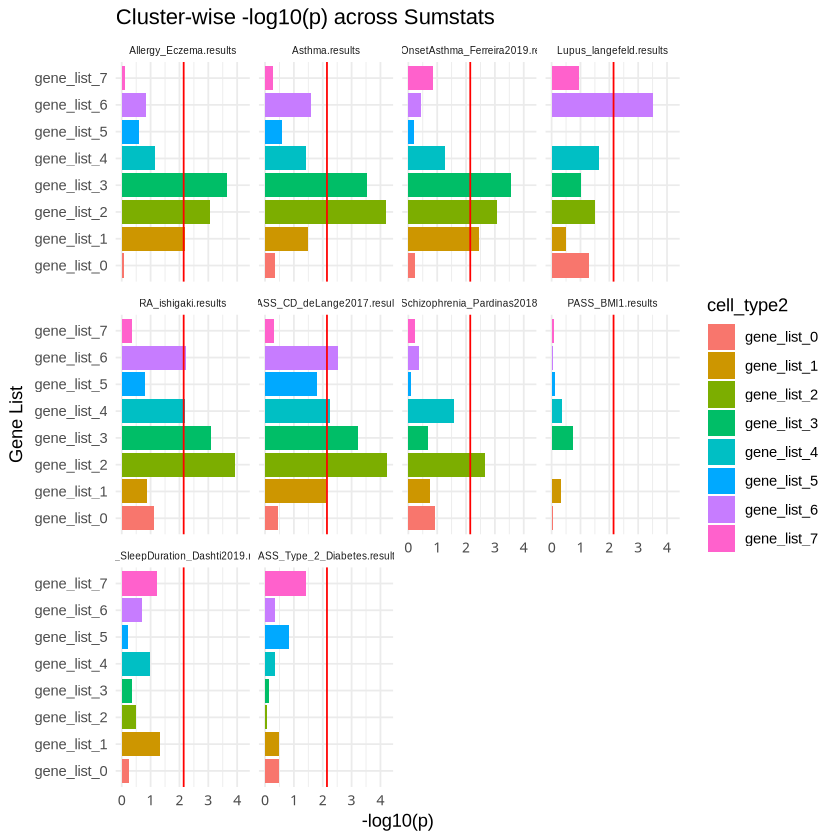

In [30]:
# 指定した順番で並べ替えるリスト
sumstats_list <- c(
  'Allergy_Eczema.results',
  'Asthma.results',
  'AdultOnsetAsthma_Ferreira2019.results',
  'Lupus_langefeld.results',
  'RA_ishigaki.results',
  'PASS_CD_deLange2017.results',
  'PASS_Schizophrenia_Pardinas2018.results',
  'PASS_BMI1.results',
  'PASS_SleepDuration_Dashti2019.results',
  'PASS_Type_2_Diabetes.results'
)

# sumstatsname をファクター化（指定された順番）
merge_df2$sumstatsname <- factor(merge_df2$sumstatsname, levels = sumstats_list)

# ggplotで棒グラフを描画
library(ggplot2)
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(
    strip.text.x = element_text(size = 6),  # ファセットタイトルのフォントサイズを調整
    strip.text.y = element_text(angle = 0)  # ファセットタイトルの角度を調整
  ) +
  geom_vline(xintercept = -log10(0.05/7), color = 'red')  # 有意閾値のラインを追加

# グラフを保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.png"), width = 10, height = 10)


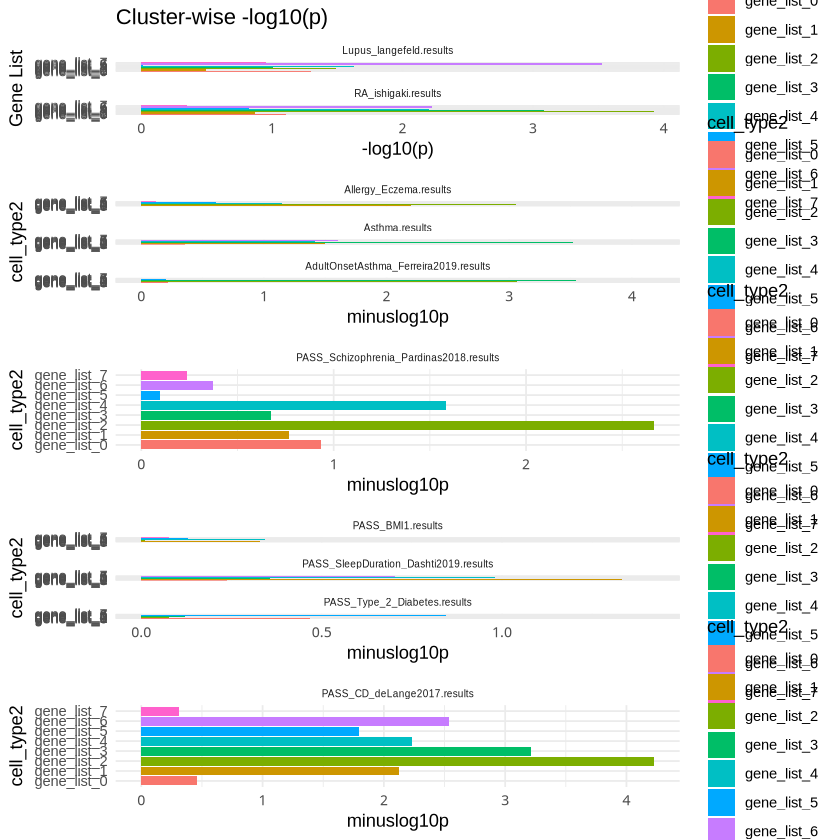

In [30]:
# パッケージの読み込み
library(ggplot2)
library(gridExtra)

# 個別のプロット作成
plot1 <- ggplot(subset(merge_df2, sumstatsname %in% sumstats_list[1:2]), aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 2) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p)") +
  theme(strip.text.x = element_text(size = 6))

plot2 <- ggplot(subset(merge_df2, sumstatsname %in% sumstats_list[3:5]), aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 3) +
  theme_minimal() +
  theme(strip.text.x = element_text(size = 6))

plot3 <- ggplot(subset(merge_df2, sumstatsname %in% sumstats_list[6]), aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 1) +
  theme_minimal() +
  theme(strip.text.x = element_text(size = 6))

plot4 <- ggplot(subset(merge_df2, sumstatsname %in% sumstats_list[7:9]), aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 3) +
  theme_minimal() +
  theme(strip.text.x = element_text(size = 6))

plot5 <- ggplot(subset(merge_df2, sumstatsname %in% sumstats_list[10]), aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 1) +
  theme_minimal() +
  theme(strip.text.x = element_text(size = 6))

# レイアウトを指定してプロットを結合
combined_plot <- grid.arrange(plot1, plot2, plot3, plot4, plot5, ncol = 1)

# 保存
ggsave(paste0(out_f, "/custom_barplot_minuslog10p_all_sumstats.png"), combined_plot, width = 10, height = 20)


In [27]:
# 2行レイアウト
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 2) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats - 2 Rows") +
  theme(strip.text.x = element_text(size = 6), strip.text.y = element_text(angle = 0)) +
   width = 10, height = 10)

# 3行レイアウト
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, nrow = 3) +
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats - 3 Rows") +
  theme(strip.text.x = element_text(size = 6), strip.text.y = element_text(angle = 0)) +
   width = 10, height = 10)

ERROR: Error in parse(text = input): <text>:8:14:  予想外の ',' です 
7:   theme(strip.text.x = element_text(size = 6), strip.text.y = element_text(angle = 0)) +
8:    width = 10,
                ^


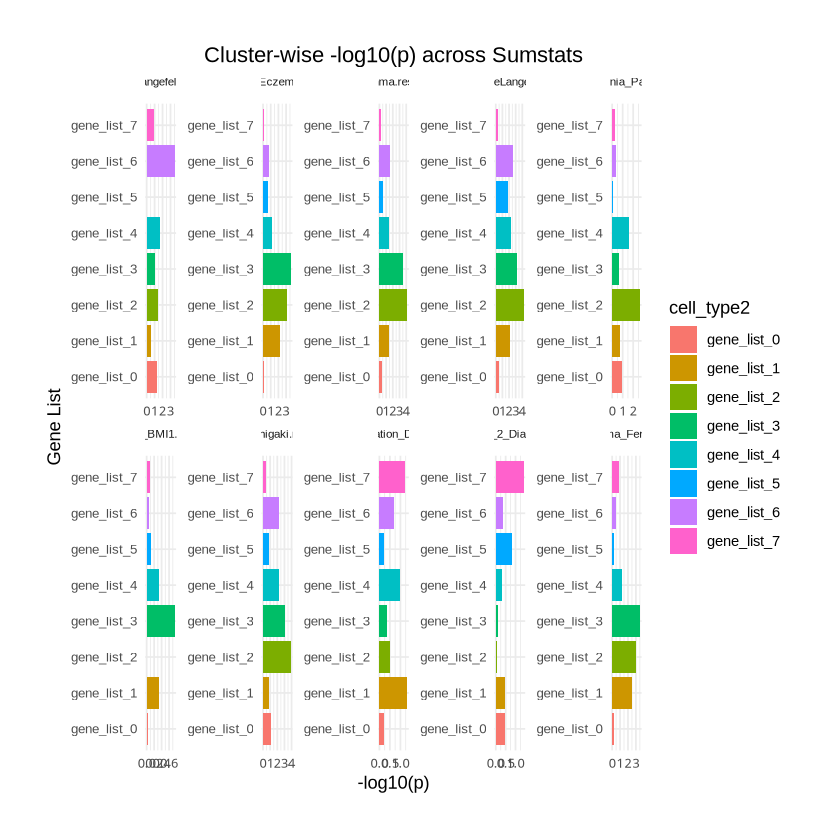

In [30]:
# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, scales = "free", nrow = 2) +  # nrowで行数を指定し、スケールを自由に
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(
    strip.text.x = element_text(size = 7, margin = margin(b = 10), lineheight = 0.8),  # タイトルのサイズと行間を調整
    axis.text.x = element_text(size = 8),  # x軸ラベルのサイズを小さく
    axis.text.y = element_text(size = 8),  # y軸ラベルのサイズを小さく
    plot.title = element_text(hjust = 0.5),  # タイトルを中央に配置
    plot.margin = unit(c(1, 1, 1, 1), "cm")  # マージンを調整
  )

# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width = 12, height = 10)


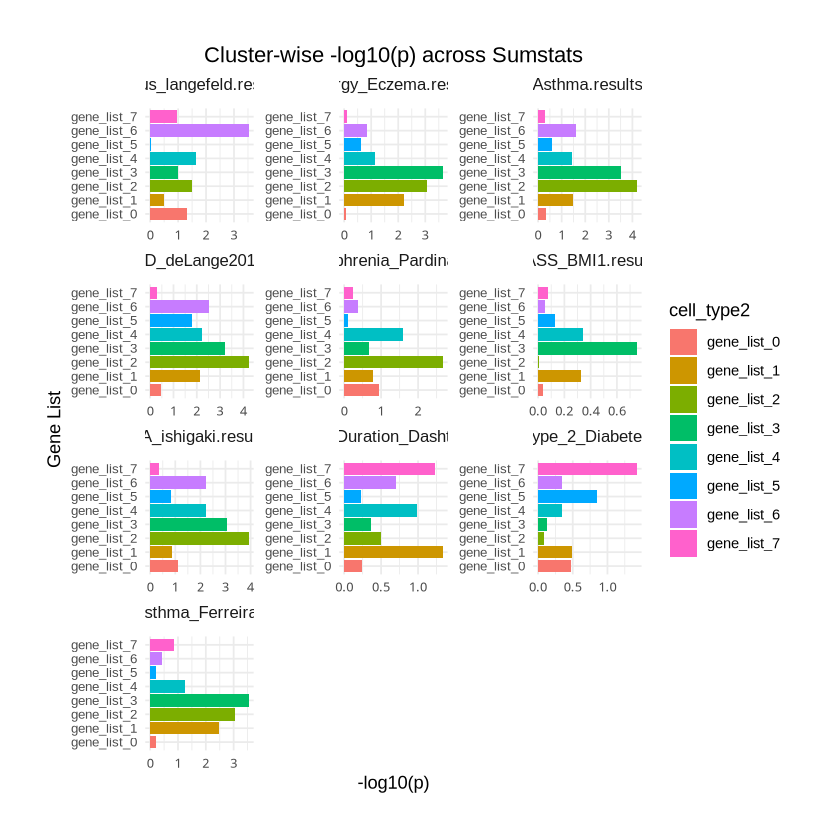

In [31]:
# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, scales = "free", ncol = 3) +  # 列数を3に指定
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(
    strip.text.x = element_text(size = 10, margin = margin(b = 10)),  # タイトルのサイズを調整
    axis.text.x = element_text(size = 8),  # x軸ラベルのサイズを調整
    axis.text.y = element_text(size = 8),  # y軸ラベルのサイズを調整
    plot.title = element_text(hjust = 0.5),  # タイトルを中央に配置
    plot.margin = unit(c(1, 1, 1, 1), "cm")  # マージンを調整
  )

# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width = 12, height = 10)


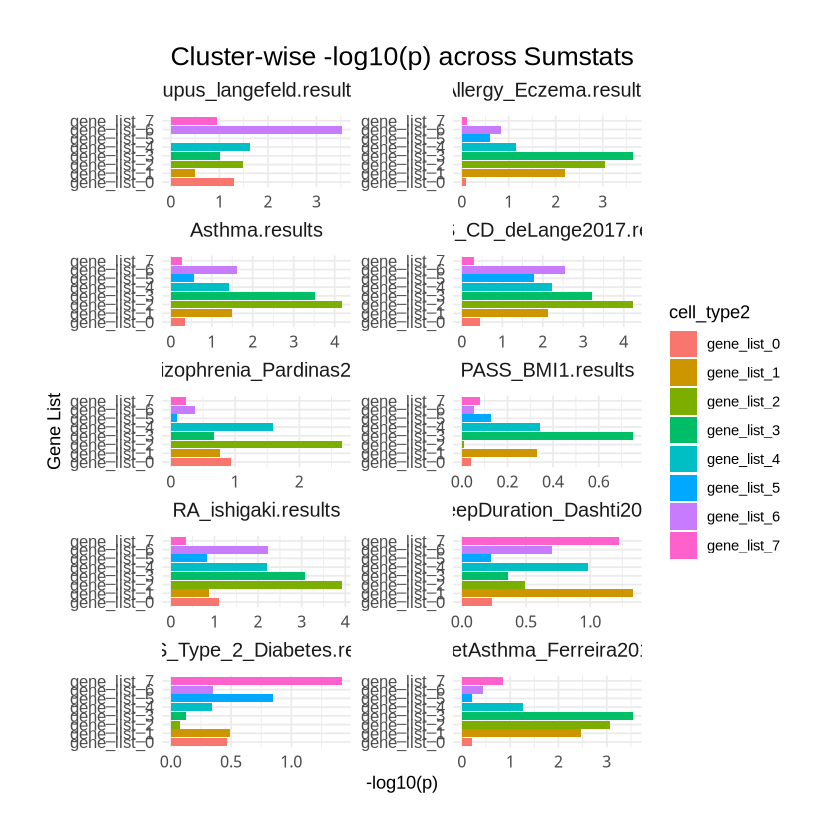

In [32]:
# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, scales = "free", ncol = 2) +  # 列数を2に変更して、タイトルが見えやすいように
  theme_minimal() +
  labs(x = "-log10(p)", y = "Gene List", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(
    strip.text.x = element_text(size = 12, margin = margin(b = 10)),  # タイトルのサイズと余白を調整
    axis.text.x = element_text(size = 10),  # x軸ラベルのサイズを調整
    axis.text.y = element_text(size = 10),  # y軸ラベルのサイズを調整
    plot.title = element_text(hjust = 0.5, size = 16),  # タイトルを中央に配置しサイズを大きく
    plot.margin = unit(c(1, 1, 1, 1), "cm")  # マージンを調整
  )

# 保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats_corrected.pdf"), width = 14, height = 12)


In [ ]:
# ggplot2 パッケージをロード
library(ggplot2)

# sumstats_listの順番でファクター化
merge_df2$sumstatsname = factor(merge_df2$sumstatsname, levels = sumstats_list)

# 有意水準 p=0.05 のラインを追加するために、その対応する -log10(p) を計算
significance_level <- -log10(0.05)

# minuslog10pの棒グラフをcell_type2ごとにプロットし、sumstatsnameごとにfacetで分割
ggplot(merge_df2, aes(x = minuslog10p, y = cell_type2, fill = cell_type2)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~sumstatsname, scales = "free_x") +   # 横軸が異なる値の範囲で適応的に表示されるようにする
  geom_vline(xintercept = significance_level, linetype = "dashed", color = "black") +  # 有意水準線を追加
  theme_minimal() +
  labs(x = "-log10(p)", y = "Cell Type", title = "Cluster-wise -log10(p) across Sumstats") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # x軸ラベルを見やすくする
    strip.text.x = element_text(size = 10),  # 各facetラベルのサイズを調整
    axis.text = element_text(size = 8),  # 軸ラベルのサイズを調整
    plot.title = element_text(hjust = 0.5)  # タイトルを中央に配置
  ) +
  scale_x_continuous(limits = c(0, 25), expand = c(0, 0))  # x軸の範囲を指定（例：0〜25）

# グラフを保存
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats_with_significance.pdf"), width = 12, height = 10)


In [14]:
##元データでも今回作成したldscoreと20240729の出来合いのldscoreが同じであることを確認する
##terminalに打ち込む
less ~/LDSC/S_LDSC_tutorial/result/20240902_tutorial/1/1.1.l2.ldscore.gz

CHR     SNP     BP      L2
1       rs3094315       752566  37.919
1       rs3131972       752721  38.001
1       rs3131969       754182  43.247
1       rs1048488       760912  37.857
1       rs3115850       761147  37.720
1       rs2286139       761732  43.106
1       rs12562034      768448  4.962
1       rs4040617       779322  40.259
1       rs2980300       785989  42.470
1       rs2519031       793947  5.974
1       rs4970383       838555  28.355
1       rs4475691       846808  36.138
1       rs1806509       853954  27.945
1       rs7537756       854250  37.235
1       rs13302982      861808  22.176
1       rs4040604       863124  22.176
1       rs28576697      870645  21.796
1       rs1110052       873558  23.650
1       rs7523549       879317  12.524
1       rs3748592       880238  18.823
1       rs3748593       880390  13.293
1       rs2272756       882033  19.722
1       rs2340582       882803  18.823
1       rs4246503       884815  18.823
1       rs3748594       886384  13.017
1       rs17160698      887162  29.009


less ~/reference/LDSCORE/1000G_Phase3_cell_type_groups/cell_type_group.1.1.l2.ldscore.gz

CHR     SNP     BP      L2
1       rs3094315       752566  37.919
1       rs3131972       752721  38.001
1       rs3131969       754182  43.245
1       rs1048488       760912  37.857
1       rs3115850       761147  37.721
1       rs2286139       761732  43.104
1       rs12562034      768448  4.962
1       rs4040617       779322  40.257
1       rs2980300       785989  42.468
1       rs2519031       793947  5.971
1       rs4970383       838555  28.363
1       rs4475691       846808  36.141
1       rs1806509       853954  27.944
1       rs7537756       854250  37.238
1       rs13302982      861808  22.173
1       rs4040604       863124  22.173
1       rs28576697      870645  21.793
1       rs1110052       873558  23.647
1       rs7523549       879317  12.523
1       rs3748592       880238  18.820
1       rs3748593       880390  13.292
1       rs2272756       882033  19.720
1       rs2340582       882803  18.820
1       rs4246503       884815  18.820
1       rs3748594       886384  13.016
1       rs17160698      887162  29.005
1       rs3748595       887560  18.905
1       rs3748597       888659  18.782



#下一桁が違うことがあるが概ね同じ

ERROR: Error in parse(text = x, srcfile = src): <text>:3:7:  予想外の '/' です 
2: ##terminalに打ち込む
3: less ~/
         ^
